**Fall 2019**

**P556: Applied Machine Learning**

**Assignment #1**

**Due date: September 18, 2019. 11:59 PM**

DO NOT CHANGE THE FUNCTION DEFINITIONS UNLESS APPROVED BY AN AI.

# Problem #1: Linear Regression

##  Problem 1.1 (25 points)

Implement linear regression using gradient descent. Your implementation should be able to handle simple and multiple linear regression.

Note 1: by implementation we mean that everything has to be written from scratch and that you cannot call a linear regression function from a library, such as sklearn. Usage of standard libraries, such as numpy, pandas, etc., is fine. If you are unsure about whether a library can be used, please contact the AIs well in advance of the submission date.

Note 2: You are free to use sklearn to test whether your results match that from a battle-tested library. This is a great way to know before hand whether your submission is correct. Make sure to use the same parameters on both models before you spend an eternity debugging code that is correct but not returning the same values.

In [30]:
import numpy as np

class linear_regression:
    def __init__(self, learning_rate, iterations, 
            fit_intercept=True, normalize=False, coef=None):

        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coef = coef

  
    def fit(self, X, y):
        """
        Fit linear model.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array_like, shape (n_samples, n_targets)
            Target values.
        """
        
        """
        In a case that the fit_intercept parameter is set to true, 
        then only we have to take into consideration the normalization else we simply ignore it.
        """
        if self.fit_intercept and self.normalize:
            X = self.do_normalization(X)
        X = self.check_fitIntercept(X) # checks if the intercept is to be added or not.
        self.coef = np.zeros(X.shape[1]) # making the shapes of X and self.coef similar
        m = y.shape[0] # number of samples
        
        """
        Logic to implement the gradient descent
        Here, a combined code implementing the following lines has been added.
        hypothesis : (h(theta) = theta0+theta1*x)
        Error : (h(theta)) - y
        theta(t+1) : theta(t) - (learning_rate/m) * sum(error*X) 
        """
        for i in range(self.iterations):
            self.coef = self.coef - ((self.learning_rate/m) * X.T.dot((X.dot(self.coef) - y)))
        
        
        
    def predict(self, X):
        
        """Predict using the linear model
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            Samples.
        Returns
        -------
        C : array, shape (n_samples,)
            Returns predicted values.
        """
        """
        Here I check if normalization is to be done on the data based 
        on whether fit_intercept parameter is set to true or not.
        
        """
        if self.fit_intercept and self.normalize:
            self.do_normalization(X)
        X = self.check_fitIntercept(X)
        #Use the generated co-efficients to generate the values on the samples from the test set.
        self.coef = self.coef.reshape(self.coef.shape[0],1)
        return X.dot(self.coef)

    
    def check_fitIntercept(self,X):
        
        """Check if the fit intercept parameter is set to true
        If yes, 
        ----------
        X : array_like, shape (n_samples, n_features)
            Samples.
        Returns
        -------
        X : array_like, shape (n_samples,n_features+1)
            If fit_intercept is set to true, I concatenate an extra column of ones to accommodate the y-intercept  
            If fit_intercept is set to false, I concatenate an extra column of zeros to accommodate the y-intercept  
        """
        if self.fit_intercept:
            ones = np.ones((X.shape[0],1), dtype=int)
            X = np.concatenate((ones,X),axis = 1)#np.c_[ones,X]
            
        else:
            zeros = np.zeros((X.shape[0],1), dtype=int)
            X = np.concatenate((zeros,X),axis = 1)
        return X

    def do_normalization(self,X):
        """
        Do the mean normalization on the data Using the formula:
        X = (X- Mean(X))/Range(X)
        where mean(X) gives us the mean of all the columns
        Range(X) is the maximum-minimum in every column.
        ------------
        X : array_like, shape (n_samples, n_features) 
        
        Returns
        ---------
        X : array_like, shape (n_samples,n_features)
        """
        return ((X - np.mean(X,axis=0))/np.ptp(X, axis=0))

## Problem 1.2 (10 points)

- Split the Boston Housing dataset into train and test sets (70% and 30%, respectively) (5 points). 
- Fit your linear regression implementation using the training set and print your model's coefficients. Make predictions for the test set using your fitted model (5 points).

In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


#loading the boston data set
boston = load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['target'] = boston.target
y = boston.target
#feature_list = df[['LSTAT','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B']]
#print(boston.feature_names)
feature_names = boston.feature_names

"""
For Linear Regression with Single Variable

"""
X = df[['LSTAT']].values
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=2)
learning_rate = 0.009
iterations = 10000
fit_intercept = True
normalization = False
coeff = []
lr = linear_regression(learning_rate, iterations, fit_intercept, normalization, coeff)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Co-efficient for Linear Regresion with one variable")
print(lr.coef)
print("Predicted the test data  results for Linear regression with one variable:")
print(y_pred)




Co-efficient for Linear Regresion with one variable
[[34.6418136 ]
 [-0.95534154]]
Predicted the test data  results for Linear regression with one variable:
[[24.81134913]
 [23.06307411]
 [31.24079771]
 [29.21547364]
 [ 5.37970218]
 [ 1.76851115]
 [23.77002685]
 [29.01485192]
 [24.98331061]
 [21.17149786]
 [29.54984318]
 [25.55651554]
 [26.90354711]
 [22.56629651]
 [12.43967617]
 [25.90999191]
 [14.14018411]
 [12.78359912]
 [ 6.88914181]
 [18.93599865]
 [28.19325819]
 [21.80202328]
 [26.90354711]
 [20.64606001]
 [20.29258364]
 [23.47387097]
 [32.98907273]
 [28.31745259]
 [30.04662078]
 [27.16148933]
 [21.17149786]
 [26.98952785]
 [29.83644564]
 [30.1803686 ]
 [15.75471132]
 [18.73537693]
 [12.09575321]
 [21.96443134]
 [24.98331061]
 [24.83045596]
 [25.56606895]
 [14.56053439]
 [29.19636681]
 [ 7.6247548 ]
 [24.38144544]
 [20.14928241]
 [31.89998337]
 [18.79269742]
 [28.04995696]
 [ 1.80672481]
 [28.03085013]
 [20.5123122 ]
 [ 5.41791584]
 [30.25679592]
 [23.0535207 ]
 [22.41344186]
 [2

In [39]:
"""
For Multi-variate Linear regression

"""
X = df[['LSTAT',"RM"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=2)
learning_rate = 0.007
iterations = 100000
fit_intercept = True
normalization = True
coeff = []
lr = linear_regression(learning_rate, iterations, fit_intercept, normalization, coeff)
lr.fit(X_train,y_train)
# predictions are made here using our new co-efficients
y_pred = lr.predict(X_test)
print("Co-efficient for Multi-variate Linear Regresion:") 
print(lr.coef)
print("Predicted the test data  results for multi variate linear regression:")
print(y_pred)


Co-efficient for Multi-variate Linear Regresion:
[[ 22.57288136]
 [-24.28177644]
 [ 24.50861214]]
Predicted the test data  results for multi variate linear regression:
[[ -67.66200741]
 [-148.88508511]
 [ 111.31731676]
 [  45.5024126 ]
 [-614.1243133 ]
 [-689.95432175]
 [ -84.71783667]
 [  49.61847771]
 [ -81.81979842]
 [-169.758443  ]
 [  53.58438795]
 [ -47.44777395]
 [ -30.0478857 ]
 [-162.46744474]
 [-378.7778411 ]
 [ -41.99275681]
 [-347.44295591]
 [-395.08420318]
 [-525.12431384]
 [-223.41618891]
 [  13.32023294]
 [-153.36484137]
 [   2.49955121]
 [-176.88823256]
 [-185.01468842]
 [-127.56209745]
 [ 164.11040439]
 [  40.10316598]
 [  83.44046604]
 [ -19.74198841]
 [-181.37552515]
 [ -23.96565649]
 [  67.09410837]
 [  63.3361557 ]
 [-326.38127262]
 [-243.78422733]
 [-414.79736592]
 [-142.91371744]
 [ -75.37403343]
 [ -76.3180842 ]
 [ -46.59224088]
 [-351.31708989]
 [  57.66322094]
 [-550.10169281]
 [ -85.23064069]
 [-193.99983233]
 [ 128.80700087]
 [-227.84273097]
 [  22.71654813]

## Problem 1.3 (10 points)

Identify the variable or set of variables that will minimize the mean square error (MSE). Hint: this is where your function being able to handle simple and multiple regression becomes useful.

In [3]:
from sklearn.metrics import mean_squared_error
import itertools as it
# Your code goes here
v = []
learning_rate = 0.007
iterations = 10
fit_intercept = True
normalization = False
coeff = []
lr = linear_regression(learning_rate, iterations, fit_intercept, normalization, coeff)
# list of all the combinations of the features available to us
for i in range(1,len(feature_names)):
     v.append(list(it.combinations(feature_names.tolist(),i)))
mse_list = []

# iterating through each combination to find the least MSE
for i in v:
    for j in i:
        X = df[list(j)].values
        columns = list(j)
        X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=2)
        lr.fit(X_train,y_train)
        y_pred = lr.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        if len(mse_list) == 0:
            mse_list.append(mse)
            mse_index = columns
            
        if mse_list[0]>mse:
            mse_list.pop()
            mse_list.append(mse)
            mse_index = columns

print("The mean squared error is : ",mse_list)        
print("The variables that reduce the Mean squared error are:", mse_index )



The mean squared error is :  [49.492346133734195]
The variables that reduce the Mean squared error are: ['CRIM', 'CHAS', 'RM']


## Problem 1.4 (5 points)

1. How do you interpret that a variable causes a model's mean square error to increase? (2 points)
  - Answer: If the difference between the predicted value and the actual value is high, the square of the difference increases.  Mean squared error glorifies the  differences, as values are squared. If the values are scattered away from the model, the likelihood of them increasing the mean squared error is huge. 
2. Why we would want to normalize our variables? (1 point)
  - Answer: We can see in the data all the different features have different ranges. This, creates a problem where in some features dominate the answer whlist the others do not contribute that much. In that case,Gradient descent will work slowly to reach the global minima as it will have wide range of features to update from.
 
3. A model fitted using the exact same split dataset with normalized values will generate the same coefficients as a model that was fitted using values that haven't been normalized. Clearly state whether that statement is true or false and explain your reasoning. (2 points)
  - Answer:No, the state is false. The model wont produce the same coefficients after being normalized since the ranges are different. After the normalization, we normally change the scale, therefore the corresponding coefficients that we get/update after normalization will be different from the original values.
  

# Problem 2: Binary Classification

## Problem 2.1 (5 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Create a plot of this dataset where all the points corresponding to one class are blue and those of the other class are green, the line dividing both classes should be red. Axes should be labeled.

**Note**: Do not confuse the $x$ and $y$ in the equation of line $ax + by + c = 0$ with $\mathcal{X} $ and $\mathcal{Y}$. Instead imagine these $x$ and $y$ as the 2-D coordinate system on which you have different points which should lie on 2 sides of the line $ax + by + c = 0$. For example, there is a point (2,3) in the 2-D system where $x = 2$ and $y = 3$.

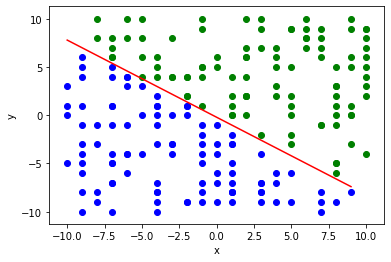

In [40]:
import matplotlib.pyplot as plt
import random as rand
import numpy as np
def generate_dataset(k0, k1):
    """
    Parameters
    ----------
    k0 : integer, number of samples for class 0
    k1 : integer, number of samples for class 1
    
    Returns
    -------
    X : array, shape (m, d), dimension numpy array where m is the number of 
    samples and d is the number of features 

    Y : array, (m, 1), dimension vector where m is the number of samples
    
    """
    m = k0+k1 # total number of points
    # co-ordinators of points
    a = rand.randint(1,10)  
    b = rand.randint(1,10) 
    c = rand.randint(1,10)
    # shape of X
    d = 2
   
    X = []
    y =[] 
    k0_l = [] #
    k1_l = []
    s = 0
    # collecting points for the k0 set
    while s<k0:
        
        rx = rand.randint(-10,10)
        ry = rand.randint(-10,10)
        if  (rx*a+ry*b+c) < 0:
            X.append([rx,ry])
            y.append([-1])
            k0_l.append([rx,ry])
            s+=1
    s=0
    # collecting points for the k1 set
    while s<k1:
        rx = rand.randint(-10,10)#(rand.randint(1,100),rand.randint(1,100))
        ry = rand.randint(-10,10)
        if  (rx*a+ry*b+c)  > 0:
            X.append([rx,ry])
            y.append([1])
            k1_l.append([rx,ry])
            s+=1
        
    X = np.asarray(X)
    y = np.asarray(y)
    k0_l = np.asarray(k0_l)
    k1_l = np.asarray(k1_l)
    j = 0
    points_x = []
    points_y = []
    for i in range(-10,10):
        points_x.append(i)
        points_y.append((-(c/b)-((a*i)/b))) #obtaining y values by substituting x in the ax+by+c=0 format
    #plot the points
    plt.plot(points_x,points_y, 'r-')
    plt.scatter(k0_l[:,0],k0_l[:,1],color='blue')
    plt.scatter(k1_l[:,0],k1_l[:,1],color='green')
    plt.xlabel("x")
    plt.ylabel("y")
    return X,y

X,y= generate_dataset(100, 100)


## Problem 2.2 (35 points)

If $\mathcal{Y}$ is the variable you are trying to predict using a feature $\mathcal{X}$ then in a typical Machine Learning problem, you are tasked with a target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$ i.e. Find $f$ such that  $\mathcal{Y}$  = $f(\mathcal{X})$


When you are given a dataset for which you do not have access the target function $f$, you have to learn it from the data. In this problem, we are going to learn the parameters of the line that separates the two classes for the dataset that we constructed in Problem 2.1. As we previously mentioned, that line can be represented as $ax + by + c = 0$.

The goal here is to correctly find out the coefficients $a$, $b$, and $c$, represented below as $\bf{w}$ which is a vector. The algorithm to find it is a simple iterative process: 

1. Randomly choose a $\mathbf{w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.



 The new coefficients of the line are [[ 7.  9. -1.]]


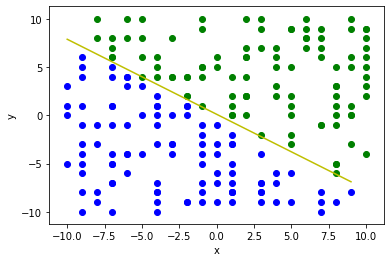

In [47]:
import random
            
def fit_line(X,y):
    
    """
    This method learns the data set and generates co-efficients to provide us 
    with the slope and the intercept of the line that should seperate the data
    
    Parameters
    ----------
     X : array, shape (m, d), dimension numpy array where m is the number of 
    samples and d is the number of features 

    Y : array, (m, 1), dimension vector where m is the number of samples
    
    -----------
    Returns : the coefficients for the binary classification
    """
    # intercept fit on the X array
    ones = np.ones((X.shape[0],1))
    X = np.c_[X,ones]

    randomList =  random.sample(range(0,X.shape[0]), X.shape[0])
    track_array = []
    w = np.random.randint(2,size=(1,3))
    """
    The steps provided in the algorithm above are performed here.
    """
    while(True):
        if len(track_array) == X.shape[0]:
            break
        randomInt = random.choice(randomList)
        if randomInt not in track_array: 
            X_val = X[randomInt]
            y_val = y[randomInt]
            y_predicted = X_val[0]*w[0][0]+w[0][1]*X_val[1]+w[0][2]
            if y_predicted < 0:
                if y_val == [-1]:
                    track_array.append(randomInt)
                    
                else:
                    updated_val = X_val * y_val
                    w = w + updated_val
                    # if the prediction goes wrong, the points that were already classified must be dicarded.
                    track_array.clear()
            else:
                if y_val == [1]:
                    track_array.append(randomInt)
                else:
                    updated_val = X_val * y_val
                    w = w + updated_val
                    # if the prediction goes wrong, the points that were already classified must be dicarded.
                    track_array.clear()

    return w
#output 
w = fit_line(X,y)
points_x1 = []
points_y1 = []
k0_list = []
k1_list = []
# plot the original points and the learned line  
for i in range(X.shape[0]):
    if y[i] == -1:
        k0_list.append(list(X[i]))
    else:
        k1_list.append(list(X[i]))
k0_list = np.asarray(k0_list)
k1_list = np.asarray(k1_list)
# generating points that fit the equation with the above obtained slope and intercept
for i in range(-10,10):
        points_x1.append(i)
        points_y1.append((-(w[0][2]/w[0][1])-((w[0][0]*i)/w[0][1])))
plt.plot(points_x1,points_y1, 'y-')
plt.scatter(k0_list[:,0],k0_list[:,1],color="blue")
plt.scatter(k1_list[:,0],k1_list[:,1],color="green")
plt.xlabel("x")
plt.ylabel("y")
print(" The new coefficients of the line are",w)


### Problem 2.3 (10 points)
- Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required. (5 points)

  - Answer:In the above algorithm, whenever we get an incorrect assumption, we update the value of the coefficient. In other words we change the slope and the y intercept of the line. So whenever we get a wrong assumption, we use the X and y co-ordinates and update the values of co-efficient. Thus, when we get a point which lies on the side of the line for which ax+by+c < 0, and if we update the current slope by adding the co-ordinates of the points, we are basically reducing the slope and thus the y co-ordinate will increase and the x will decrease. Likewise when we get a point which lies on the side of the line where ax+by+c > 0, we see that the slope increases. This keeps on changing, until we sort all the points and then reach a state where we obtain those co-efficients which linearly separate the data.
- What happens when the data is not linearly separable? What can be done to salvage the situation?

  - Answer: If the data is not linearly separable we can increase the degree of the polynomial. Ex: Linear regression with 1 variable gives us a straight line. H(x) = θ0+θ1*x
  If there is some data that is not linearly separable using the above hypothesis, then we increase the degree of the
  polynomial. For Example H(X) = θ0 + θ1 * x + θ2 * x^2+...... and so on and so forth. Increasing the ploynomial degree will
  fit the data correctly. The bias variance tradeoff is the most needed here.  